<a href="https://colab.research.google.com/github/chadantomar/ML/blob/main/first_DL.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd


In [5]:
df= pd.read_csv("/content/drive/MyDrive/Deep learing/Tensorflow/Data/c2f.csv")

In [6]:
df.head()

,Celsius,Fahrenheit
0,-50,-58.0
1,-40,-40.0
2,-30,-22.0
3,-20,-4.0
4,-10,14.0


In [12]:
df.describe()

,Celsius,Fahrenheit
count,30.000000,30.000000
mean,2.000000,35.600000
std,22.780815,41.005466
min,-50.000000,-58.000000
25%,-6.750000,19.850000
50%,0.500000,32.900000
75%,7.750000,45.950000
max,60.000000,140.000000


In [9]:
 import seaborn as sns

In [11]:
df.reset_index(drop=True, inplace=True)

<Axes: xlabel='Celsius', ylabel='Fahrenheit'>

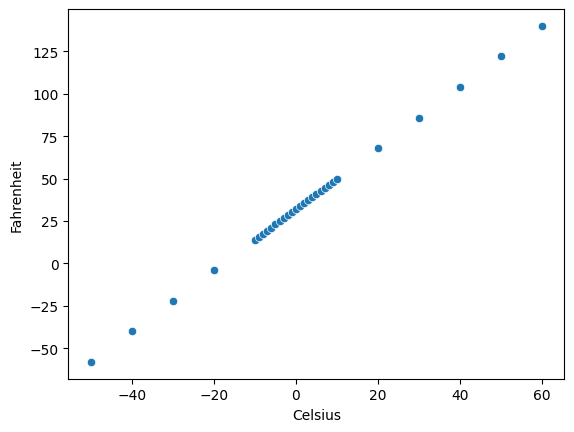

In [14]:
sns.scatterplot(x=df['Celsius'],y=df['Fahrenheit'])

In [15]:
import tensorflow as tf


In [18]:
model= tf.keras.Sequential()
model.add(tf.keras.layers.Dense(units=1, input_shape=[1]))

In [19]:
model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 1)                 2         
                                                                 
Total params: 2 (8.00 Byte)
Trainable params: 2 (8.00 Byte)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [ ]:
##Using Optimizer we are trying to get Weight and Bias of the parameters , here we have only 1 input so will be 1 weight and bais

In [21]:
model.compile(optimizer= tf.keras.optimizers.Adam(0.5), loss="mean_squared_error")

In [24]:
x_train=df['Celsius']
y_train=df['Fahrenheit']

In [28]:
hist_model=model.fit(x_train,y_train,epochs=100)

Epoch 1/100
1/1 [==============================] - 0s 15ms/step - loss: 1.3357
Epoch 2/100
1/1 [==============================] - 0s 11ms/step - loss: 1.1866
Epoch 3/100
1/1 [==============================] - 0s 12ms/step - loss: 1.0476
Epoch 4/100
1/1 [==============================] - 0s 11ms/step - loss: 0.9187
Epoch 5/100
1/1 [==============================] - 0s 10ms/step - loss: 0.8033
Epoch 6/100
1/1 [==============================] - 0s 10ms/step - loss: 0.7037
Epoch 7/100
1/1 [==============================] - 0s 9ms/step - loss: 0.6181
Epoch 8/100
1/1 [==============================] - 0s 9ms/step - loss: 0.5422
Epoch 9/100
1/1 [==============================] - 0s 13ms/step - loss: 0.4723
Epoch 10/100
1/1 [==============================] - 0s 9ms/step - loss: 0.4078
Epoch 11/100
1/1 [==============================] - 0s 11ms/step - loss: 0.3504
Epoch 12/100
1/1 [==============================] - 0s 11ms/step - loss: 0.3015
Epoch 13/100
1/1 [==============================] - 

In [30]:
dir(hist_model)

['__class__',
 '__delattr__',
 '__dict__',
 '__dir__',
 '__doc__',
 '__eq__',
 '__format__',
 '__ge__',
 '__getattribute__',
 '__gt__',
 '__hash__',
 '__init__',
 '__init_subclass__',
 '__le__',
 '__lt__',
 '__module__',
 '__ne__',
 '__new__',
 '__reduce__',
 '__reduce_ex__',
 '__repr__',
 '__setattr__',
 '__sizeof__',
 '__str__',
 '__subclasshook__',
 '__weakref__',
 '_chief_worker_only',
 '_implements_predict_batch_hooks',
 '_implements_test_batch_hooks',
 '_implements_train_batch_hooks',
 '_keras_api_names',
 '_keras_api_names_v1',
 '_supports_tf_logs',
 'epoch',
 'history',
 'model',
 'on_batch_begin',
 'on_batch_end',
 'on_epoch_begin',
 'on_epoch_end',
 'on_predict_batch_begin',
 'on_predict_batch_end',
 'on_predict_begin',
 'on_predict_end',
 'on_test_batch_begin',
 'on_test_batch_end',
 'on_test_begin',
 'on_test_end',
 'on_train_batch_begin',
 'on_train_batch_end',
 'on_train_begin',
 'on_train_end',
 'params',
 'set_model',
 'set_params',
 'validation_data']

In [34]:
hist_model.history.keys()

dict_keys(['loss'])

In [35]:
import matplotlib.pyplot as plt

Here we can the around 40 its become starin line , which means that till  40 iteration  it  minimize the loss , so no need to train the model post 40 epochs

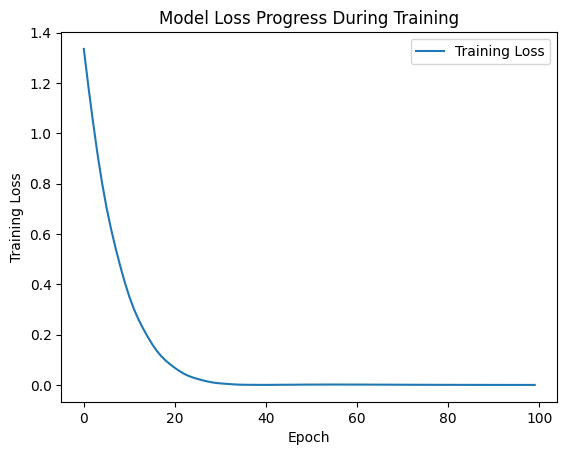

In [37]:
plt.plot(hist_model.history['loss'])
plt.title('Model Loss Progress During Training')
plt.xlabel('Epoch')
plt.ylabel('Training Loss')
plt.legend(['Training Loss'])

In [39]:
model.get_weights()

[array([[1.7999814]], dtype=float32), array([32.002644], dtype=float32)]

In [40]:
9/5

1.8

The equation is as follows: T(°F) = T(°C) × 9/5 + 32
Now we can see there are 2 coeffient  value and intercepts ,
Y=mx+c
where m =9/5 and c =32
Depending on data , our tensor understand what should be model equation to predict values

In [41]:
y_predict= model.predict([32])

1/1 [==============================] - 0s 82ms/step


In [42]:
y_predict

array([[89.60205]], dtype=float32)

In [43]:
#Now lets put equation in actual equation which we know
#T(°F) = T(°C) × 9/5 + 32
y_f=32 *(9/5)+32
y_f

89.6